In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn

In [20]:
df = pd.read_csv('total.csv')

In [21]:
df = df.reindex(columns = ['tr_log_testduration', 'tr_log_num_tests_failed', 'tr_log_lan', 'tr_log_num_tests_run','loc', 'tr_log_bool_tests_failed'])

In [22]:
df = df.rename(columns={'tr_log_testduration': 'time', 'tr_log_num_tests_failed': 'failed_count', 'tr_log_lan' : 'language', 'tr_log_num_tests_run' : 'test_count', 'tr_log_bool_tests_failed' : 'status'})

In [24]:
df = df[df['failed_count'].notnull() & df['time'].notnull() & df['test_count'].notnull() & df['status'].notnull()]

In [25]:
df.eval('log_test_count = log(test_count)', inplace = True)
df.eval('log_time = log(time)', inplace = True)
df.eval('fail_rate = failed_count / test_count', inplace = True)

In [26]:
df = df[(df['loc'] > 500) & (df['time'] > 1) & (df['test_count'] > 1) & (df['status'] == False)]
df = df[((df["loc"] - df["loc"].mean()).abs() < 3 * df["loc"].std()) & 
        ((df["log_test_count"] - df["log_test_count"].mean()).abs() < 3 * df["log_test_count"].std()) &
       ((df["log_time"] - df["log_time"].mean()).abs() < 3 * df["log_time"].std())]

In [27]:
df = df[(df['language'] == 'java') | (df['language'] == 'ruby') | (df['language'] == 'python')]

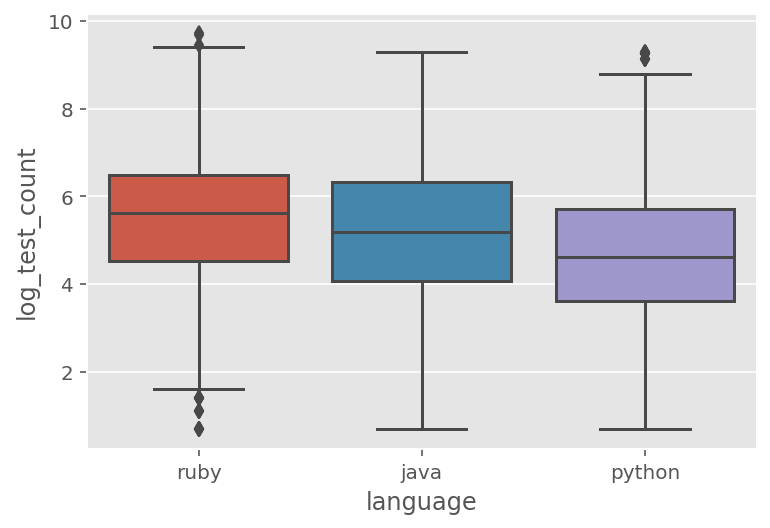

In [32]:
fig = sns.boxplot(x = 'language', y = 'log_test_count', data = df)

In [33]:
s = fig.get_figure()
s.savefig('pic3.jpg')

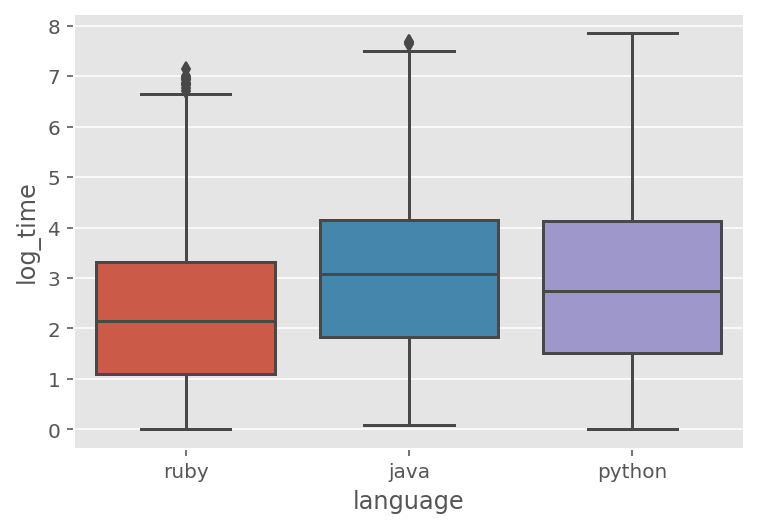

In [35]:
fig1 = sns.boxplot(x = 'language', y = 'log_time', data = df)

In [36]:
s1 = fig1.get_figure()
s1.savefig('pic4.jpg')